In [1]:
# %load np_load_allow_pickle_True.py
import numpy as np 
np_load_old = np.load
np.load = lambda *a, **k: np_load_old(*a, allow_pickle=True, **k)

# np.load 사용 후 반드시 아래 코드를 실행할 것!!!
# np.load = np_load_old

In [2]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = \
    reuters.load_data(num_words=10000)

Using TensorFlow backend.


In [3]:
np.load = np_load_old

In [4]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [11]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [12]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [14]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 187us/step - loss: 3.2516 - acc: 0.3919 - val_loss: 2.5445 - val_acc: 0.5570
Epoch 2/20
7982/7982 [==============================] - 1s 119us/step - loss: 1.9857 - acc: 0.6160 - val_loss: 1.6177 - val_acc: 0.6510
Epoch 3/20
7982/7982 [==============================] - 1s 121us/step - loss: 1.3387 - acc: 0.7122 - val_loss: 1.2897 - val_acc: 0.7070
Epoch 4/20
7982/7982 [==============================] - 1s 120us/step - loss: 1.0328 - acc: 0.7755 - val_loss: 1.1365 - val_acc: 0.7510
Epoch 5/20
7982/7982 [==============================] - 1s 118us/step - loss: 0.8188 - acc: 0.8183 - val_loss: 1.0350 - val_acc: 0.7730
Epoch 6/20
7982/7982 [==============================] - 1s 120us/step - loss: 0.6441 - acc: 0.8613 - val_loss: 0.9725 - val_acc: 0.7980
Epoch 7/20
7982/7982 [==============================] - 1s 117us/step - loss: 0.5023 - acc: 0.8910 - val_loss: 0.9230 - val_acc: 0.8120


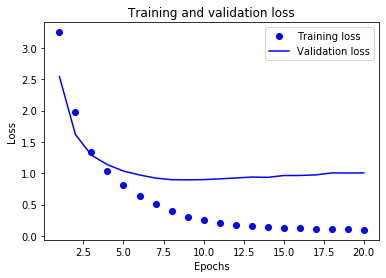

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

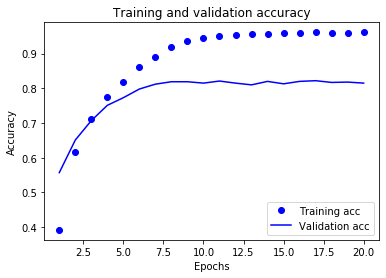

In [16]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend();

In [17]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 149us/step - loss: 3.4842 - acc: 0.3067 - val_loss: 2.9045 - val_acc: 0.5350
Epoch 2/9
7982/7982 [==============================] - 1s 117us/step - loss: 2.2689 - acc: 0.5931 - val_loss: 1.8163 - val_acc: 0.6300
Epoch 3/9
7982/7982 [==============================] - 1s 118us/step - loss: 1.4523 - acc: 0.6981 - val_loss: 1.3404 - val_acc: 0.7040
Epoch 4/9
7982/7982 [==============================] - 1s 117us/step - loss: 1.0695 - acc: 0.7722 - val_loss: 1.1510 - val_acc: 0.7540
Epoch 5/9
7982/7982 [==============================] - 1s 117us/step - loss: 0.8312 - acc: 0.8276 - val_loss: 1.0372 - val_acc: 0.7910
Epoch 6/9
7982/7982 [==============================] - 1s 117us/step - loss: 0.6456 - acc: 0.8676 - val_loss: 0.9660 - val_acc: 0.8010
Epoch 7/9
7982/7982 [==============================] - 1s 118us/step - loss: 0.4966 - acc: 0.8988 - val_loss: 0.9105 - val_acc: 0.8120
Epoch 8

In [18]:
results

[0.9649026988344541, 0.7920747996968874]

In [19]:
predictions = model.predict(x_test)
print(predictions[0].max())
print(np.argmax(predictions[0]))

0.9566052
3
